# Portfolio Analysis

In this project, we seek to run through some common portfolio construction and asset allocation strategies to gain some insights into the usefulness of standard measures like sharpe ratio. The end goal is to test such strategies to a sufficient level of rigour that we can convincingly employ them into our portfolio rebalancing pipeline. I will start off by testing my own portfolio and the procedures should be generalizable. Let's get started!

## 0. Project Setup

##### Assets

1. Sea Limited (NYSE:'**SE**')
2. Bilibili Inc (NASDAQ:'**BILI**')
3. Pinduoduo Inc (NASDAQ:'**PDD**')
4. NVIDIA Corporation (NASDAQ:'**NVDA**') 
5. Peloton Inc (NASDAQ:'**PTON**')
6. Unity Software Inc (NYSE:'**U**')
7. Intel Corporation (NASDAQ: '**INTC**)
8. Alphabet Inc (NASDAQ:'**GOOG**)
9. Amazon.com Inc (NASDAQ:'**AMZN**)
10. Square Inc (NASDAQ:'**SQ**')
11. Shopify Inc (NASDAQ:'**SHOP**')
12. Roku Inc (NASDAQ:'**ROKU**')
13. Microsoft Corporation (NASDAQ:'**MSFT**')
14. Apple Inc (NASDAQ:'**AAPL**')
15. Facebook Inc (NASDAQ:'**FB**')
16. Blackrock Inc (NYSE:'**BLK**')
17. Berkshire Hathaway Inc (NYSE:'**BRK-B**')
18. Intellia Therapeutics Inc (NASDAQ:'**NTLA**')
17. Draftkings Inc (NASDAQ:'**DKNG**')
18. Clearpoint Neuro Inc (NASDAQ:'**CLPT**')

##### Data

Daily adjusted closing prices from yahoo finance API 

##### Time period

1 year, 3 year, 5 year & 10 year.

In [25]:
# Load the required packages 
# Computation
import numpy as np 
from scipy import fftpack
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Data analysis
import pandas as pd
from sklearn import preprocessing
# Data source
import yfinance as yf

## 1. Data Analysis

In [48]:
# shortlisted stocks for analysis
s_list = 'SE BILI PDD NVDA PTON U INTC GOOG AMZN SQ SHOP ROKU MSFT AAPL FB BLK BRK-B NTLA DKNG CLPT'
df_1y = yf.download(tickers = s_list, period = '1y', interval = '1d', group_by = 'ticker')
df_3y = yf.download(tickers = s_list, period = '3y', interval = '1d', group_by = 'ticker')
df_5y = yf.download(tickers = s_list, period = '5y', interval = '1d', group_by = 'ticker')
df_10y = yf.download(tickers = s_list, period = '10y', interval = '1d', group_by = 'ticker')



[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed


In [49]:
# filter for adjusted close prices
df_close_1y = df_1y.xs('Adj Close', level = 1, axis = 1)
df_close_3y = df_3y.xs('Adj Close', level = 1, axis = 1)
df_close_5y = df_5y.xs('Adj Close', level = 1, axis = 1)
df_close_10y = df_10y.xs('Adj Close', level = 1, axis = 1)
# df_close = df.loc[:,(slice(None),'Adj Close')]

# check the last 5 trading days
df_close_1y.tail(5)

,NTLA,BILI,AMZN,CLPT,BRK-B,MSFT,PTON,INTC,SQ,DKNG,BLK,ROKU,PDD,U,NVDA,FB,SHOP,AAPL,GOOG,SE
Date,,,,,,,,,,,,,,,,,,,,
2021-07-20,146.119995,111.919998,3573.189941,17.209999,276.890015,279.320007,126.349998,55.240002,246.470001,45.820000,878.840027,417.200012,102.250000,100.160004,186.119995,341.660004,1524.780029,146.149994,2622.030029,279.640015
2021-07-21,152.750000,115.580002,3585.199951,17.570000,279.880005,281.399994,126.430000,56.230000,257.250000,48.880001,882.679993,422.130005,104.519997,103.309998,194.100006,346.230011,1569.359985,145.399994,2652.010010,293.920013
2021-07-22,147.880005,108.660004,3638.030029,18.360001,277.700012,286.140015,119.669998,55.959999,260.589996,49.240002,866.859985,420.649994,104.959999,104.199997,195.940002,351.190002,1594.089966,146.800003,2666.570068,293.790009
2021-07-23,137.710007,95.209999,3656.639893,20.150000,278.489990,289.670013,121.550003,53.000000,264.000000,49.330002,868.950012,473.649994,97.309998,105.500000,195.580002,369.790009,1643.319946,148.559998,2756.320068,297.670013
2021-07-26,134.000000,87.459999,3699.820068,20.450001,278.799988,289.049988,122.680000,54.310001,261.989990,49.220001,871.489990,479.500000,88.709999,103.320000,192.940002,372.459991,1582.280029,148.990005,2792.889893,289.720001


<AxesSubplot:xlabel='Date'>

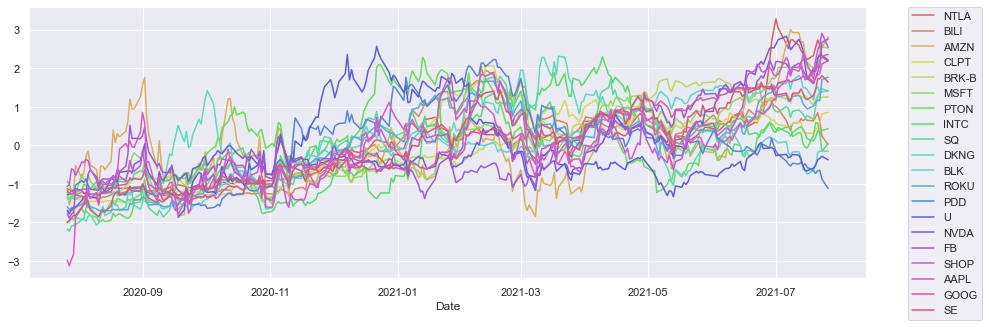

In [50]:
# normalize the prices 
df_close_1y_norm = (df_close_1y - df_close_1y.mean())/df_close_1y.std()

# plotting out the prices
# plot configurations
sns.set(style="darkgrid")
palette = sns.color_palette("hls", 20)
fig, ax = plt.subplots(figsize=(15, 5))
# plotting out the figure
plot1 = sns.lineplot(ax=ax, data = df_close_1y_norm, dashes = False, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot1

In [51]:
# check the size 
df_close_1y.size

5040

In [61]:
# convert the price into rate of return
df_return_1y = df_close_1y.pct_change()
df_return_3y = df_close_3y.pct_change()
df_return_5y = df_close_5y.pct_change()
df_return_10y = df_close_10y.pct_change()

# check the descriptive statistics of 1 year rate of return
df_return_1y.describe()

,NTLA,BILI,AMZN,CLPT,BRK-B,MSFT,PTON,INTC,SQ,DKNG,BLK,ROKU,PDD,U,NVDA,FB,SHOP,AAPL,GOOG,SE
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,213.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.009420,0.004047,0.000926,0.007133,0.001547,0.001561,0.003579,0.000690,0.003527,0.002143,0.001858,0.005254,0.001212,0.002826,0.002830,0.002099,0.002479,0.002059,0.002543,0.004383
std,0.062777,0.046251,0.018134,0.050440,0.011277,0.016133,0.043717,0.020960,0.034759,0.040285,0.015268,0.039641,0.044496,0.042140,0.027189,0.021908,0.033320,0.021522,0.016981,0.036559
min,-0.134290,-0.170397,-0.054456,-0.136024,-0.029872,-0.061947,-0.202853,-0.105751,-0.089950,-0.084906,-0.046489,-0.124132,-0.135180,-0.141312,-0.092775,-0.063099,-0.136268,-0.080061,-0.054630,-0.103195
25%,-0.029718,-0.023193,-0.009668,-0.024023,-0.005336,-0.006346,-0.020702,-0.010246,-0.016684,-0.024832,-0.007578,-0.017626,-0.025266,-0.024076,-0.011339,-0.011444,-0.018226,-0.009183,-0.006212,-0.017390
50%,0.004066,0.001585,0.001234,0.001506,0.001523,0.001484,0.004516,0.000818,0.002941,-0.000399,0.002411,0.002630,-0.000940,-0.000413,0.003142,0.000061,0.001636,0.001255,0.002896,0.005425
75%,0.038567,0.031746,0.011209,0.034452,0.008294,0.012120,0.029676,0.012679,0.024748,0.025298,0.011678,0.025267,0.024201,0.028658,0.019598,0.014773,0.023744,0.013851,0.011320,0.027621
max,0.502083,0.221735,0.063230,0.164811,0.060570,0.056241,0.144746,0.069685,0.130400,0.172697,0.040412,0.176669,0.204109,0.162555,0.080333,0.083227,0.114021,0.104689,0.073961,0.108809


### Rate of Return

In [101]:
# compute the annualized average rate of return across a 1 year, 3 year, 5 year & 10 year horizon.
nday = 252 # number of trading days
from functools import reduce
df_return_1y_mean = pd.DataFrame(data = df_return_1y.mean(axis = 0), columns = ['1Y Annual Return']) * nday
df_return_3y_mean = pd.DataFrame(data = df_return_3y.mean(axis = 0), columns = ['3Y Annual Return']) * nday
df_return_5y_mean = pd.DataFrame(data = df_return_5y.mean(axis = 0), columns = ['5Y Annual Return']) * nday
df_return_10y_mean = pd.DataFrame(data = df_return_10y.mean(axis = 0), columns = ['10Y Annual Return']) * nday
data_frames = [df_return_1y_mean, df_return_3y_mean, df_return_5y_mean, df_return_10y_mean]
df_return_merge = pd.concat(data_frames, axis = 1)

#df_return_10y_mean.plot.barh()
df_return_merge

,1Y Annual Return,3Y Annual Return,5Y Annual Return,10Y Annual Return
NTLA,2.373941,0.883921,0.706962,0.649578
BILI,1.019872,0.857276,0.825961,0.825961
AMZN,0.233478,0.291177,0.366192,0.330779
CLPT,1.797534,1.083696,0.637681,0.375947
BRK-B,0.389905,0.145166,0.155295,0.151993
MSFT,0.393274,0.393555,0.382091,0.291964
PTON,0.901799,1.114913,1.114913,1.114913
INTC,0.173795,0.147612,0.174104,0.161617
SQ,0.888893,0.625644,0.795868,0.676608
DKNG,0.540002,1.019263,1.019263,1.019263


In [ ]:
# 

### Variance

In [16]:
# compute the pearson pairwise correlation matrix
df_return_1y.corr(method='pearson')

,PTON,NTLA,AMZN,BRK-B,SQ,ROKU,U,CLPT,BILI,NVDA,PDD,DKNG,AAPL,SHOP,MSFT,INTC,BLK,FB,GOOG,SE
PTON,1.000000,0.295929,0.340311,-0.147294,0.443833,0.503745,0.380549,0.147185,0.250745,0.386795,0.216277,0.213407,0.321649,0.534462,0.316993,0.181630,0.164534,0.195660,0.107031,0.395037
NTLA,0.295929,1.000000,0.205262,0.055941,0.450823,0.318200,0.353263,0.290987,0.372135,0.360089,0.262911,0.259063,0.201390,0.306598,0.266715,0.241077,0.257695,0.180070,0.183361,0.349173
AMZN,0.340311,0.205262,1.000000,0.054420,0.506603,0.380348,0.435954,0.118269,0.264379,0.605159,0.341264,0.289225,0.698783,0.536311,0.716009,0.326038,0.340931,0.673254,0.599893,0.453948
BRK-B,-0.147294,0.055941,0.054420,1.000000,-0.033617,-0.093554,-0.107655,0.033732,-0.014285,0.061669,0.006349,0.153249,0.198706,-0.121221,0.204231,0.305161,0.560214,0.158090,0.293831,-0.033980
SQ,0.443833,0.450823,0.506603,-0.033617,1.000000,0.573417,0.537064,0.298417,0.456209,0.608710,0.304357,0.332275,0.437559,0.647407,0.499834,0.257533,0.306566,0.350562,0.330911,0.603323
ROKU,0.503745,0.318200,0.380348,-0.093554,0.573417,1.000000,0.505705,0.239636,0.374127,0.445522,0.284886,0.234182,0.341718,0.559135,0.386590,0.172334,0.185649,0.332150,0.255455,0.522998
U,0.380549,0.353263,0.435954,-0.107655,0.537064,0.505705,1.000000,0.351113,0.333860,0.378575,0.322578,0.324358,0.342459,0.483065,0.383049,0.143716,0.158415,0.286031,0.172198,0.463045
CLPT,0.147185,0.290987,0.118269,0.033732,0.298417,0.239636,0.351113,1.000000,0.177999,0.159662,0.168811,0.190795,0.125327,0.232264,0.184241,0.020301,0.131765,0.106292,0.123156,0.252290
BILI,0.250745,0.372135,0.264379,-0.014285,0.456209,0.374127,0.333860,0.177999,1.000000,0.358367,0.564139,0.204924,0.296757,0.368401,0.254416,0.164835,0.147009,0.220582,0.235492,0.580408
NVDA,0.386795,0.360089,0.605159,0.061669,0.608710,0.445522,0.378575,0.159662,0.358367,1.000000,0.336998,0.264007,0.595289,0.568738,0.660196,0.404118,0.395245,0.507653,0.491701,0.553216


In [15]:
# compute the pairwise variance covariance matrix 
df_return_1y.cov()

,PTON,NTLA,AMZN,BRK-B,SQ,ROKU,U,CLPT,BILI,NVDA,PDD,DKNG,AAPL,SHOP,MSFT,INTC,BLK,FB,GOOG,SE
PTON,0.001914,0.000815,0.000271,-0.000073,0.000677,0.000876,0.000704,0.000326,0.000506,0.000460,0.000419,0.000377,0.000303,0.000780,0.000224,0.000167,0.000110,0.000188,0.000080,0.000633
NTLA,0.000815,0.003951,0.000234,0.000040,0.000987,0.000794,0.000983,0.000924,0.001077,0.000616,0.000731,0.000657,0.000273,0.000642,0.000271,0.000317,0.000248,0.000248,0.000196,0.000803
AMZN,0.000271,0.000234,0.000330,0.000011,0.000320,0.000274,0.000323,0.000109,0.000221,0.000299,0.000274,0.000212,0.000274,0.000324,0.000210,0.000124,0.000095,0.000268,0.000185,0.000302
BRK-B,-0.000073,0.000040,0.000011,0.000128,-0.000013,-0.000042,-0.000052,0.000019,-0.000007,0.000019,0.000003,0.000070,0.000048,-0.000046,0.000037,0.000072,0.000097,0.000039,0.000056,-0.000014
SQ,0.000677,0.000987,0.000320,-0.000013,0.001213,0.000793,0.000787,0.000525,0.000731,0.000577,0.000469,0.000467,0.000329,0.000751,0.000281,0.000188,0.000163,0.000268,0.000196,0.000768
ROKU,0.000876,0.000794,0.000274,-0.000042,0.000793,0.001578,0.000861,0.000481,0.000684,0.000482,0.000500,0.000375,0.000293,0.000739,0.000248,0.000143,0.000113,0.000290,0.000172,0.000760
U,0.000704,0.000983,0.000323,-0.000052,0.000787,0.000861,0.001782,0.000749,0.000668,0.000416,0.000617,0.000519,0.000274,0.000676,0.000238,0.000133,0.000103,0.000248,0.000120,0.000706
CLPT,0.000326,0.000924,0.000109,0.000019,0.000525,0.000481,0.000749,0.002554,0.000414,0.000220,0.000377,0.000389,0.000137,0.000391,0.000151,0.000021,0.000102,0.000118,0.000106,0.000466
BILI,0.000506,0.001077,0.000221,-0.000007,0.000731,0.000684,0.000668,0.000414,0.002118,0.000449,0.001148,0.000381,0.000295,0.000565,0.000189,0.000159,0.000104,0.000223,0.000184,0.000977
NVDA,0.000460,0.000616,0.000299,0.000019,0.000577,0.000482,0.000416,0.000220,0.000449,0.000740,0.000406,0.000290,0.000349,0.000516,0.000291,0.000230,0.000165,0.000303,0.000228,0.000551


## 2. Portfolio Construction

## Minimum Variance Portfolio 

Given a portfolio of $n$ assets and a required portfolio rate of return $\mu_{p}$, find $w_{i}$ for $i \in [1:n]$ such that the portfolio variance $\sigma_{p}$ is minimized. 

## Maximum Return Portfolio

Given a portfolio of $n$ assets and a maximum portfolio variance  $\sigma_{p}$, find $w_{i}$ for $i \in [1:n]$ such that the portfolio rate of return $\mu_{p}$ is minimized. 